#                                 # Uber Pickups Rides Analysis





In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.path.abspath("")

df = pd.read_csv(r'C:/Users/suman/Downloads/uber-raw-data-aug14.csv')

df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


# Date with most number of Uber pickups


In [20]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract the date and count the number of pickups for each date
date_counts = df['Date/Time'].dt.date.value_counts()

# Find the date with the maximum pickups
max_pickups_date = date_counts.idxmax()

print("Date with the most number of Uber pickups:", max_pickups_date)




Date with the most number of Uber pickups: 2014-08-07


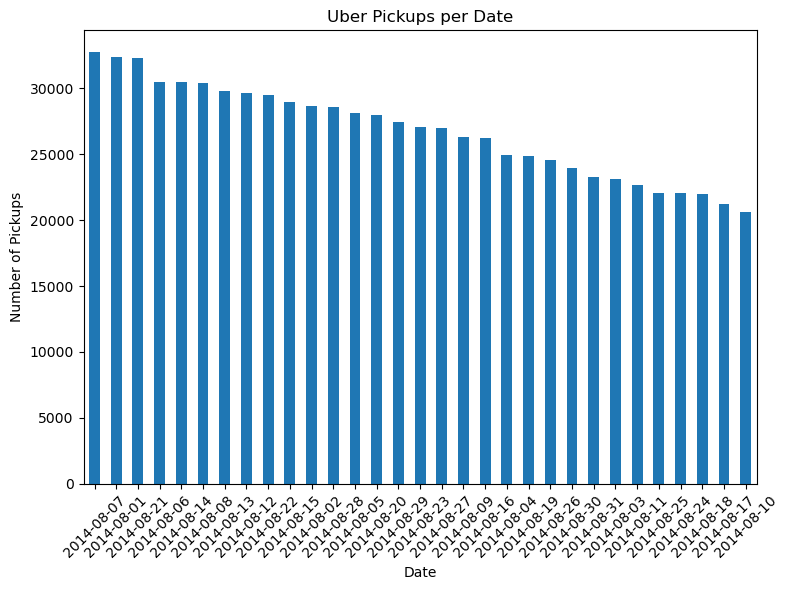

In [29]:
date_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Uber Pickups per Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Uber pickups  made on the date with the highest number of pickups

In [23]:
date_counts = df['Date/Time'].dt.date.value_counts()

# Find the date with the maximum pickups
max_pickups_date = date_counts.idxmax()

# Get the number of pickups on the date with the highest number of pickups
pickups_on_max_date = date_counts[max_pickups_date]

print("Date with the most number of Uber pickups:", max_pickups_date)
print("Number of pickups on the max date:", pickups_on_max_date)




Date with the most number of Uber pickups: 2014-08-07
Number of pickups on the max date: 32759


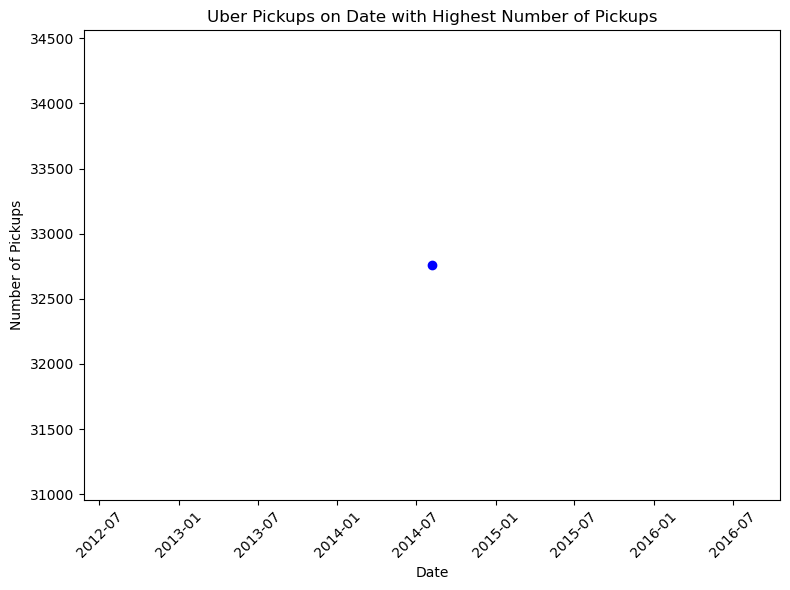

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(max_pickups_date, pickups_on_max_date, color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Uber Pickups on Date with Highest Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  TLC base  Uber pickups

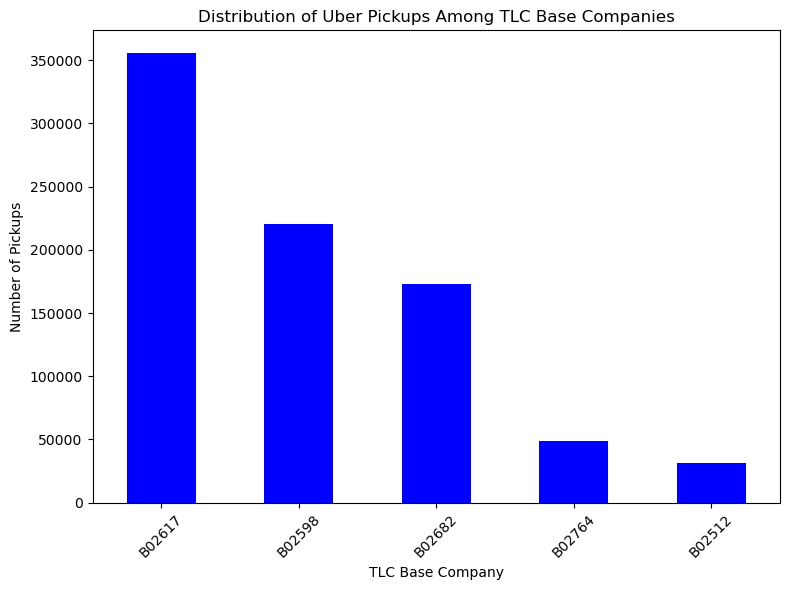

In [28]:
base_counts = df['Base'].value_counts()

# Plot the distribution of Uber pickups among TLC base companies
plt.figure(figsize=(8, 6))
base_counts.plot(kind='bar', color='blue')
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Distribution of Uber Pickups Among TLC Base Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#   busiest time of day for Uber pickups

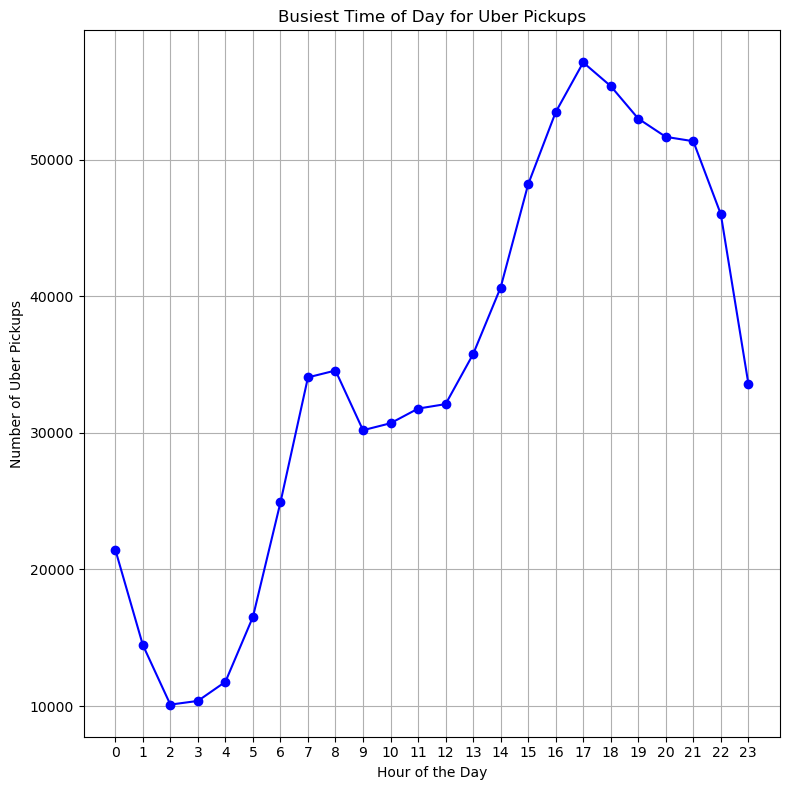

In [42]:
df['Hour'] = df['Date/Time'].dt.hour

# Count the number of pickups for each hour
hourly_pickups = df['Hour'].value_counts().sort_index()

# Plot the busiest time of day for Uber pickups
plt.figure(figsize=(8, 8))
hourly_pickups.plot(kind='line', marker='o', color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Uber Pickups')
plt.title('Busiest Time of Day for Uber Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()




#  visualize the distribution of Uber pickups based on latitude and longitude

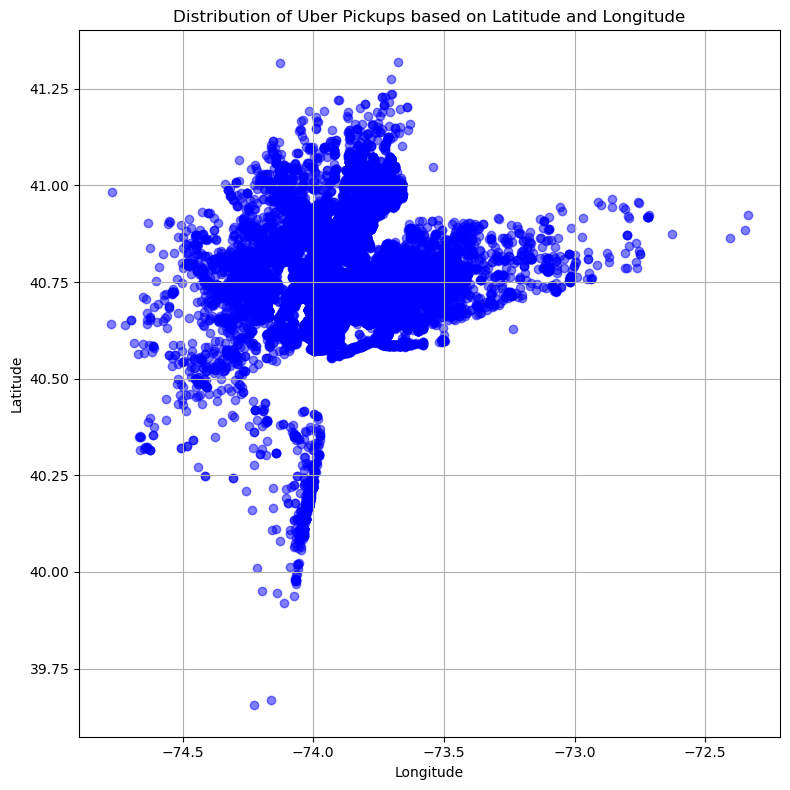

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(df['Lon'], df['Lat'], color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups based on Latitude and Longitude')
plt.grid(True)
plt.tight_layout()
plt.show()


# percentage distribution of Uber pickups for each day of the week

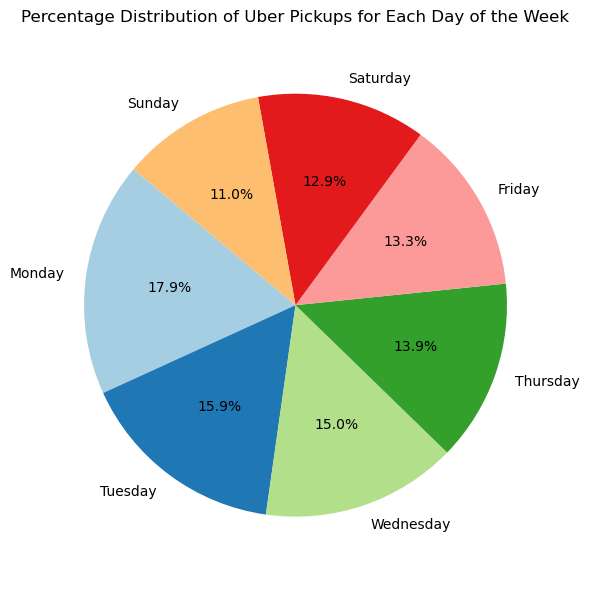

In [36]:
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek

# Map day of the week to its corresponding name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayName'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Calculate the percentage distribution of Uber pickups for each day of the week
pickup_percentages = df['DayOfWeek'].value_counts(normalize=True) * 100

# Plot the percentage distribution of Uber pickups for each day of the week using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(pickup_percentages, labels=day_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Uber Pickups for Each Day of the Week')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Rides Distribution Weekend Vs Weekdays

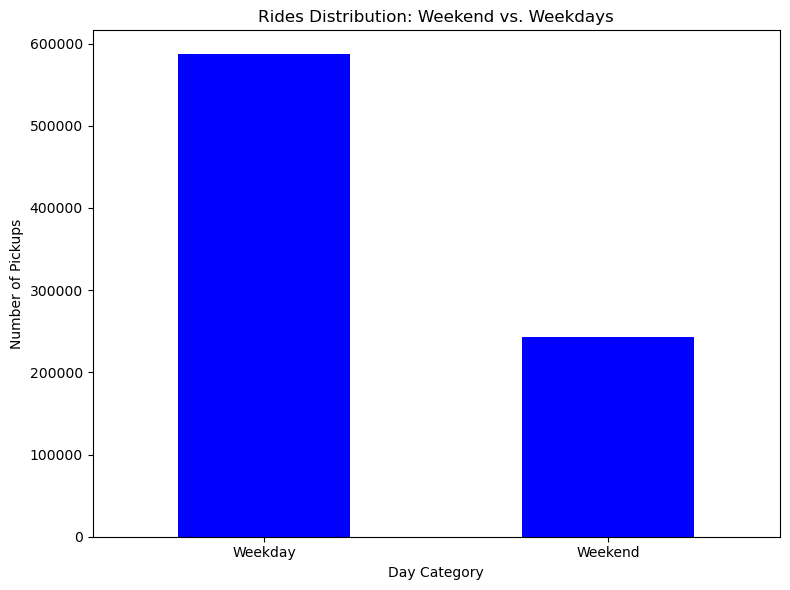

In [37]:
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek

# Map day of the week to its corresponding name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayName'] = df['DayOfWeek'].map(lambda x: day_names[x])

# Define a function to categorize days into 'Weekend' or 'Weekday'
def categorize_day(day):
    if day in [5, 6]:  # Saturday or Sunday
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the categorize_day function to create a new column
df['DayCategory'] = df['DayOfWeek'].apply(categorize_day)

# Count the number of pickups for each weekend and weekday
day_category_counts = df['DayCategory'].value_counts()

# Plot the distribution of rides between weekends and weekdays
plt.figure(figsize=(8, 6))
day_category_counts.plot(kind='bar', color='blue')
plt.xlabel('Day Category')
plt.ylabel('Number of Pickups')
plt.title('Rides Distribution: Weekend vs. Weekdays')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Location with Most Pickups with time and date

In [38]:
location_pickups = df.groupby(['Lat', 'Lon']).size().reset_index(name='PickupCount')

# Find the row with the highest number of pickups
max_pickup_row = location_pickups.loc[location_pickups['PickupCount'].idxmax()]

# Extract the latitude, longitude, and corresponding time and date from the original DataFrame
max_pickup_latitude = max_pickup_row['Lat']
max_pickup_longitude = max_pickup_row['Lon']
max_pickup_count = max_pickup_row['PickupCount']

max_pickup_time_date = df[(df['Lat'] == max_pickup_latitude) & (df['Lon'] == max_pickup_longitude)].iloc[0]['Date/Time']

print("Location with the most pickups:")
print("Latitude:", max_pickup_latitude)
print("Longitude:", max_pickup_longitude)
print("Pickup Count:", max_pickup_count)
print("Time and Date of the most pickups:", max_pickup_time_date)

Location with the most pickups:
Latitude: 40.6448
Longitude: -73.7819
Pickup Count: 708.0
Time and Date of the most pickups: 2014-08-04 17:05:00


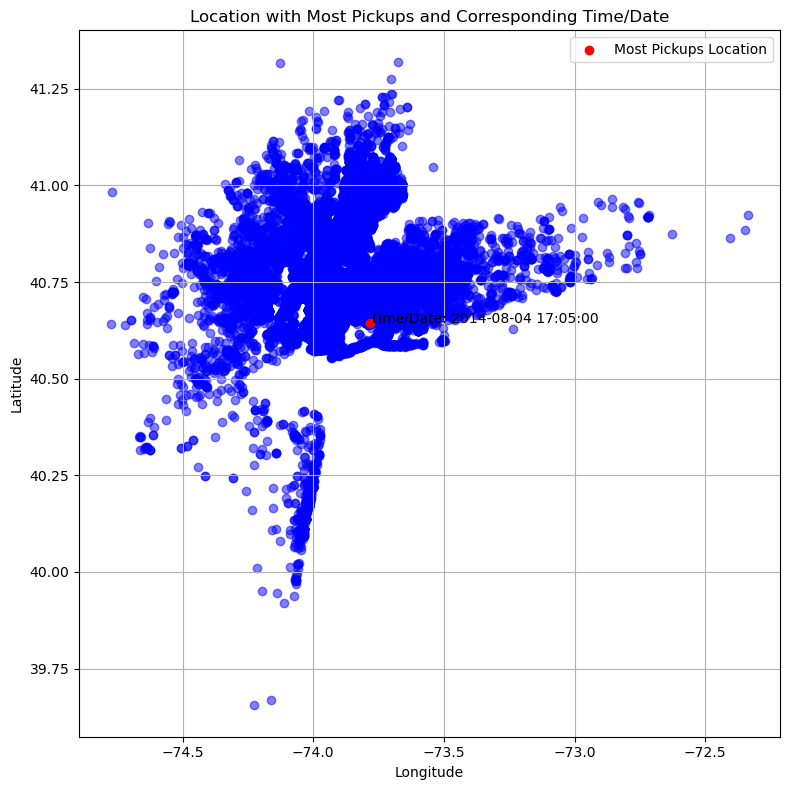

In [40]:
location_pickups = df.groupby(['Lat', 'Lon']).size().reset_index(name='PickupCount')

# Find the row with the highest number of pickups
max_pickup_row = location_pickups.loc[location_pickups['PickupCount'].idxmax()]

# Extract the latitude, longitude, and corresponding time and date from the original DataFrame
max_pickup_latitude = max_pickup_row['Lat']
max_pickup_longitude = max_pickup_row['Lon']

max_pickup_time_date = df[(df['Lat'] == max_pickup_latitude) & (df['Lon'] == max_pickup_longitude)].iloc[0]['Date/Time']

# Plot the location with the most pickups
plt.figure(figsize=(8, 8))
plt.scatter(df['Lon'], df['Lat'], color='blue', alpha=0.5)
plt.scatter(max_pickup_longitude, max_pickup_latitude, color='red', label='Most Pickups Location')
plt.text(max_pickup_longitude, max_pickup_latitude, f"Time/Date: {max_pickup_time_date}", fontsize=10, color='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location with Most Pickups and Corresponding Time/Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Longest and the Shortest Ride on the basis of lat long

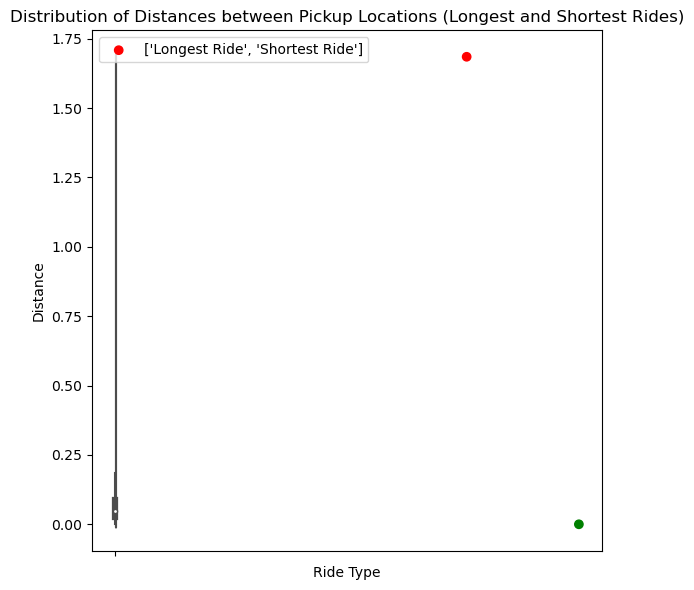

In [48]:
df['Distance'] = ((df['Lat'].diff())**2 + (df['Lon'].diff())**2)**0.5

# Find the index of the longest and shortest ride
longest_ride_index = df['Distance'].idxmax()
shortest_ride_index = df['Distance'].idxmin()

# Create a violin plot for the distribution of distances
plt.figure(figsize=(6, 6))
sns.violinplot(data=df, y='Distance', color='blue')
plt.scatter([longest_ride_index, shortest_ride_index],
            [df.loc[longest_ride_index, 'Distance'], df.loc[shortest_ride_index, 'Distance']],
            color=['red', 'green'], marker='o', label=['Longest Ride', 'Shortest Ride'])
plt.xlabel('Ride Type')
plt.ylabel('Distance')
plt.title('Distribution of Distances between Pickup Locations (Longest and Shortest Rides)')
plt.legend()
plt.tight_layout()
plt.show()